In [18]:
import os
import tarfile
from six.moves import urllib

DL_ROOT = "https://github.com/ageron/handson-ml/blob/master/"
HOUSING_PATH = "datasets/housing/"
HOUSING_URL = DL_ROOT + HOUSING_PATH + "housing.tgz"

def fetch_housing_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path = housing_path)
    housing_tgz.close()

In [16]:
fetch_housing_data()

ReadError: file could not be opened successfully

In [17]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_filename = os.path.join(housing_path, 'housing.csv')
    return pd.read_csv(csv_filename)
    

In [20]:
housing_data = load_housing_data()

In [21]:
housing_data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [22]:
housing_data.info

<bound method DataFrame.info of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
5        -122.25     37.85                52.0        919.0           213.0   
6        -122.25     37.84                52.0       2535.0           489.0   
7        -122.25     37.84                52.0       3104.0           687.0   
8        -122.26     37.84                42.0       2555.0           665.0   
9        -122.25     37.84                52.0       3549.0           707.0   
10       -122.26     37.85                52.0       2202.0           434.0   
11       -122.26    

In [25]:
housing_data["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [26]:
housing_data.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

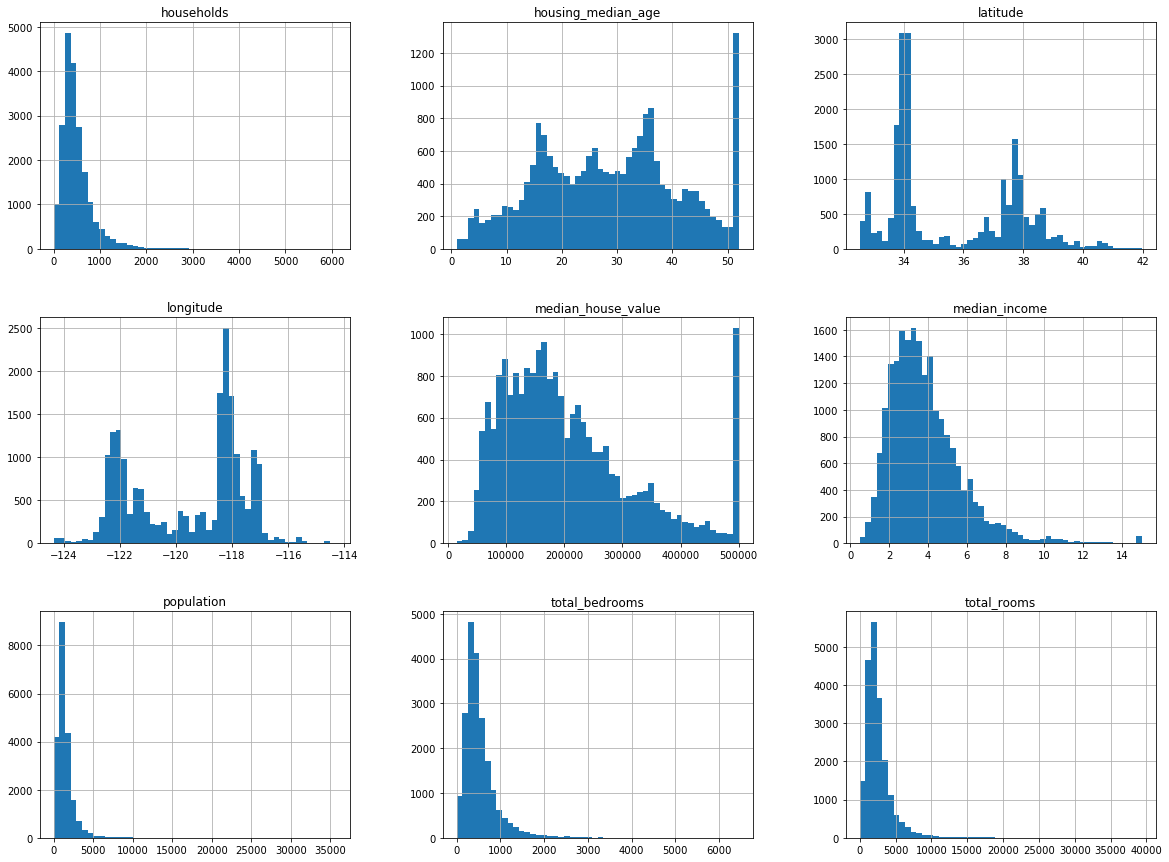

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
housing_data.hist(bins = 50, figsize = (20,15))
plt.show()

In [89]:
import numpy as np

def split_train_test_indices(data, test_ratio = 0.2, seed = 42):
    np.random.seed(seed)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    train_indices = shuffled_indices[test_set_size:]
    test_indices = shuffled_indices[:test_set_size]
    return train_indices, test_indices

def split_train_test(data, test_ratio = 0.2, seed = 42):
    train_indices, test_indices = split_train_test_indices(data, test_ratio, seed)
    return data.iloc[train_indices], data.iloc[test_indices]

In [87]:
from sklearn.model_selection import train_test_split
train_data, test_data = split_train_test(housing_data, test_ratio = 0.2)
print("Using custom splitter:", len(train_data), "train +", len(test_data), "test")
train_data, test_data = train_test_split(housing_data, test_size= 0.2, random_state = 42)
print("Using sklearn splitter:", len(train_data), "train +", len(test_data), "test")


Using custom splitter: 16512 train + 4128 test
Using sklearn splitter: 16512 train + 4128 test


In [93]:
from sklearn.model_selection import StratifiedShuffleSplit
housing_data["income_cat"] = np.ceil(housing_data["median_income"] / 1.5)
housing_data["income_cat"].where(housing_data["income_cat"] < 5.0 , 5.0, inplace = True)

# Stratified sampling
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
#http://docs.w3cub.com/scikit_learn/modules/generated/sklearn.model_selection.stratifiedshufflesplit/#sklearn.model_selection.StratifiedShuffleSplit.split
# n doesnt have to be 1, hence the loop over 
for train_index, test_index in split.split(housing_data, housing_data["income_cat"]):
    # dataframe.loc('a') will return the idx in dataframe of label 'a'
    # != iloc (integer based indexing)
    strat_train_set = housing_data.loc[train_index]
    strat_test_set  = housing_data.loc[test_index]
# Purely random sampling
rand_train_index, rand_test_index = split_train_test_indices(housing_data)
rand_train_set = housing_data.iloc[rand_train_index]

print("Housing data\n", housing_data["income_cat"].value_counts() / len(housing_data))
print("Rand data\n", rand_train_set["income_cat"].value_counts() / len(rand_train_set))
print("Strat train data\n", strat_train_set["income_cat"].value_counts() / len(strat_train_set))




Housing data
 3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64
Rand data
 3.0    0.348595
2.0    0.317466
4.0    0.178537
5.0    0.115673
1.0    0.039729
Name: income_cat, dtype: float64
Strat train data
 3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114402
1.0    0.039850
Name: income_cat, dtype: float64


In [94]:
for set in (strat_train_set, strat_test_set):
    set.drop(["income_cat"], axis = 1, inplace = True)

In [95]:
housing = strat_train_set.copy()

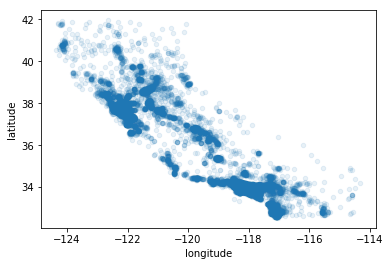

In [97]:
housing.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.1)

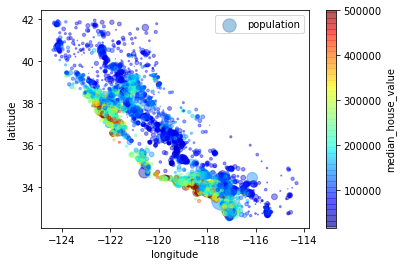

In [102]:
housing.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.4, 
            s = housing["population"] / 100, label = "population",
            c = "median_house_value", cmap = plt.get_cmap("jet"), colorbar = True,
            sharex = False)


In [103]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11cafef60>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x121f1ae10>]], dtype=object)

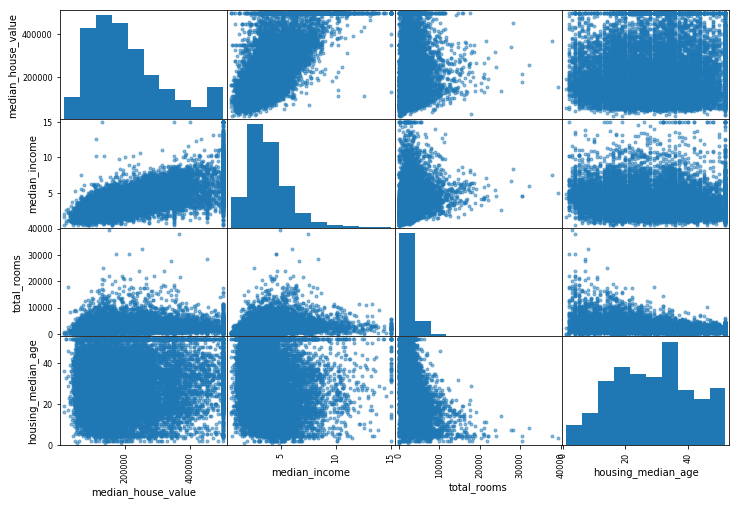

In [105]:
from pandas.tools.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))


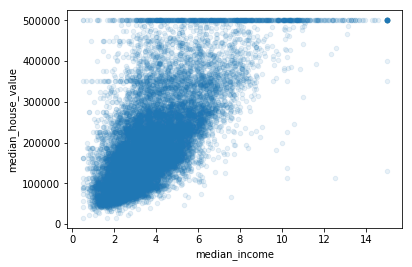

In [106]:
housing.plot(kind = "scatter", x = "median_income", y = "median_house_value", alpha = 0.1)

In [109]:
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value     1.000000
median_income          0.687160
rooms_per_household    0.146285
total_rooms            0.135097
housing_median_age     0.114110
households             0.064506
total_bedrooms         0.047689
population            -0.026920
longitude             -0.047432
latitude              -0.142724
bedrooms_per_room     -0.259984
Name: median_house_value, dtype: float64

In [144]:
housing        = strat_train_set.drop("median_house_value", axis = 1)
housing_labels = strat_train_set["median_house_value"].copy()
housing.info()
# total_bedrooms has missing values that we ll replace with the median

from sklearn.preprocessing import Imputer

imputer = Imputer(strategy = "median")
# axis refers to the dimension of the array, in the case of pd.DataFrames 
# axis=0 is the dimension that points downwards (col-wise) 
# and axis=1 the one that points to the right (row-wise).
housing_num = housing.drop("ocean_proximity", axis = 1)

imputer.fit(housing_num)
housing_tr = pd.DataFrame(imputer.transform(housing_num), columns = housing_num.columns)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 9 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16354 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [135]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
ocean_labels = housing["ocean_proximity"]
ocean_encoded_labels = encoder.fit_transform(ocean_labels)
print(encoder.classes_)

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(ocean_encoded_labels.reshape(-1,1))

from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(ocean_encoded_labels)
housing_cat_1hot

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ..., 
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

In [141]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

nun_pipeline = Pipeline([
    ('imputer',  Imputer(strategy = 'median')),
    ('std_scaler', StandardScaler())
])
housing_num_tr = nun_pipeline.fit_transform(housing_num)
print(housing_num.head())

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17606    -121.89     37.29                38.0       1568.0           351.0   
18632    -121.93     37.05                14.0        679.0           108.0   
14650    -117.20     32.77                31.0       1952.0           471.0   
3230     -119.61     36.31                25.0       1847.0           371.0   
3555     -118.59     34.23                17.0       6592.0          1525.0   

       population  households  median_income  
17606       710.0       339.0         2.7042  
18632       306.0       113.0         6.4214  
14650       936.0       462.0         2.8621  
3230       1460.0       353.0         1.8839  
3555       4459.0      1463.0         3.0347  


In [194]:
from sklearn.pipeline import FeatureUnion
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

import numpy as np

def displayScores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("StdDev:", scores.std())

class DataFrameToNPArray(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y = None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values
    
housing_data = load_housing_data()
print("Housing data head")
print(housing_data.head())

# Transform the income_cat columns
housing_data["income_cat"] = np.ceil(housing_data["median_income"] / 1.5)
housing_data["income_cat"].where(housing_data["income_cat"] < 5.0 , 5.0, inplace = True)

# Stratified sampling
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
# n doesnt have to be 1, hence the loop over 
for train_index, test_index in split.split(housing_data, housing_data["income_cat"]):
    # dataframe.loc('a') will return the idx in dataframe of label 'a'
    # != iloc (integer based indexing)
    strat_train_set = housing_data.loc[train_index]
    strat_test_set  = housing_data.loc[test_index]
    
# Separate predictors and labels
housing = strat_train_set.drop("median_house_value", axis = 1)
housing_labels = strat_train_set["median_house_value"].copy()
# axis refers to the dimension of the array, in the case of pd.DataFrames 
# axis=0 is the dimension that points downwards (col-wise) 
# and axis=1 the one that points to the right (row-wise).
housing_num = housing.drop("ocean_proximity", axis = 1)
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
    ('selector', DataFrameToNPArray(num_attribs)),
    ('imputer', Imputer(strategy = "median")),
    ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('selector', DataFrameToNPArray(cat_attribs)),
    ('label_binarizer', LabelBinarizer()), #1 hot encode the labels
])

full_pipeline = FeatureUnion(transformer_list = [
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline),
])

housing_prepared = full_pipeline.fit_transform(housing)

# Linear regression model
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)
# expect a utility function rather than a cost function
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, 
                         scoring = "neg_mean_squared_error", cv = 10)
print("Linear model scores")
displayScores(np.sqrt(-scores))

# Tree model
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, 
                         scoring = "neg_mean_squared_error", cv = 10)
print("Tree model scores")
displayScores(np.sqrt(-scores))

# Forest model
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
scores = cross_val_score(forest_reg, housing_prepared, housing_labels, 
                         scoring = "neg_mean_squared_error", cv = 10)
print("Forest model scores")
displayScores(np.sqrt(-scores))


Housing data head
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
Linear model scores
Scores: [ 67621.36459192  67050.28937

In [195]:
# Grid search on forest hyper parameters
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators' : [3, 10],
     'max_features' : [2, 4]
    },
    {'bootstrap' : [False], 
     'n_estimators' : [3, 10]
    }
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv = 5, scoring = 'neg_mean_squared_error')
grid_search.fit(housing_prepared, housing_labels)

print("Best params:", grid_search.best_params_)
print("Best estimator: ", grid_search.best_estimator_)

cat_one_hot_attribs = list(encoder.classes_)
attributes = num_attribs + cat_one_hot_attribs
print("Features importance:", 
      sorted(zip(grid_search.best_estimator_.feature_importances_,
                 attributes), reverse = True))
print("*** Individual scores ***")
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

Best params: {'max_features': 4, 'n_estimators': 10}
Best estimator:  RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=4, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
Features importance: [(0.25236596847861609, 'median_income'), (0.18712696430394385, 'income_cat'), (0.10568525199911871, 'latitude'), (0.099881487012373427, 'longitude'), (0.09747830624110769, 1), (0.048730055762450999, 'housing_median_age'), (0.048344688420625455, 'population'), (0.038607741571369869, 'total_rooms'), (0.037000272468081546, 'total_bedrooms'), (0.033288420738624244, 'households'), (0.021887944678567663, 0), (0.01810819666504395, 4), (0.011444268652031476, 3), (5.0433008044953778e-05, 2)]
*** Individual scores ***
64574.0386487 {'max_features': 2, 'n_estimators': 3}
5

In [201]:
# Full prediction
final_model = grid_search.best_estimator_
x_test = strat_test_set.drop("median_house_value", axis = 1)
y_test = strat_test_set["median_house_value"].copy()
x_test_prepared = full_pipeline.transform(x_test)
final_predictions = final_model.predict(x_test_prepared)
print(np.sqrt(mean_squared_error(y_test, final_predictions)))


52013.2858486
